In [56]:
import numpy as np
import matplotlib.pyplot as pyplot
import scipy.stats as sps
from sklearn import datasets,cross_validation,neighbors,metrics
from matplotlib.colors import ListedColormap
%matplotlib inline

In [132]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize=(8, 8))
    pyplot.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])),
                   c = data[1], cmap = colors, s=10000/len(data[0]))


Сгенерируем даные

In [156]:
size=200
classification_problem = datasets.make_classification(n_samples=size,n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1, random_state = 1)

colors = ListedColormap(['red', 'blue', 'green', 'yellow'])

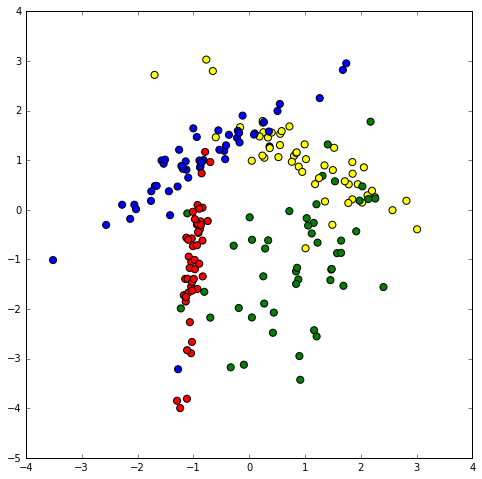

In [157]:
plot_2d_dataset(classification_problem, colors)

In [158]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0],
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state=123)
float(len(test_labels))/len(classification_problem[0])

0.3

In [159]:
light_colors = ListedColormap(['lightcoral', 'lightblue','lightgreen', 'lightyellow'])
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

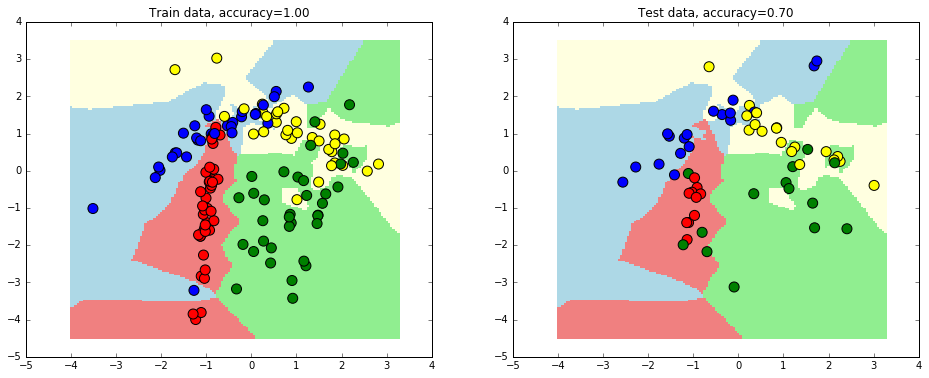

In [160]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

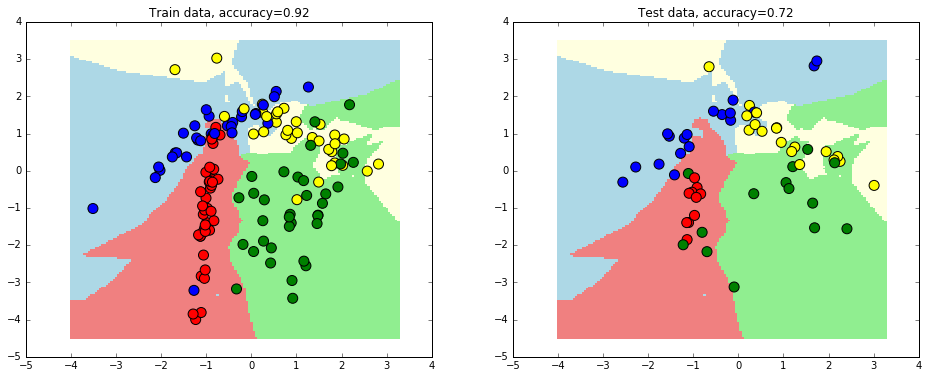

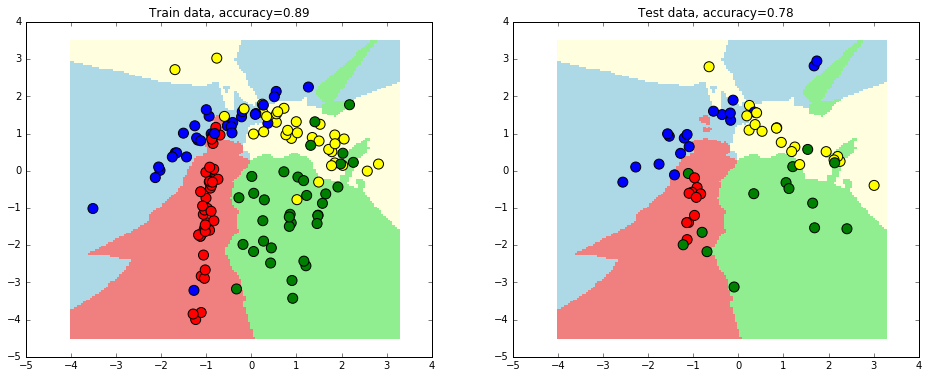

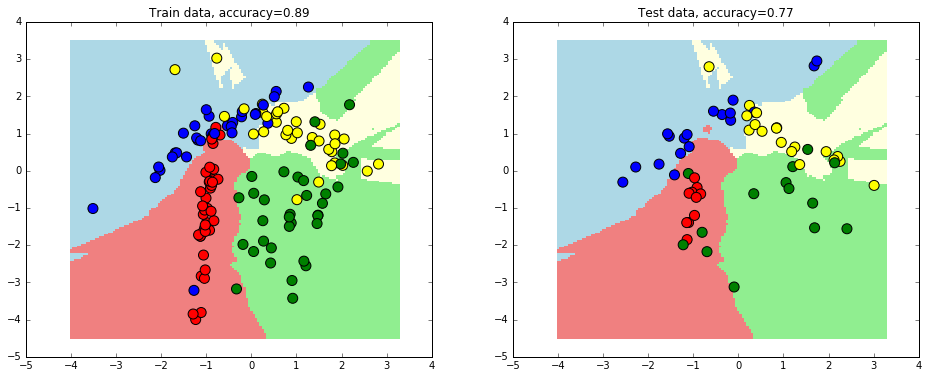

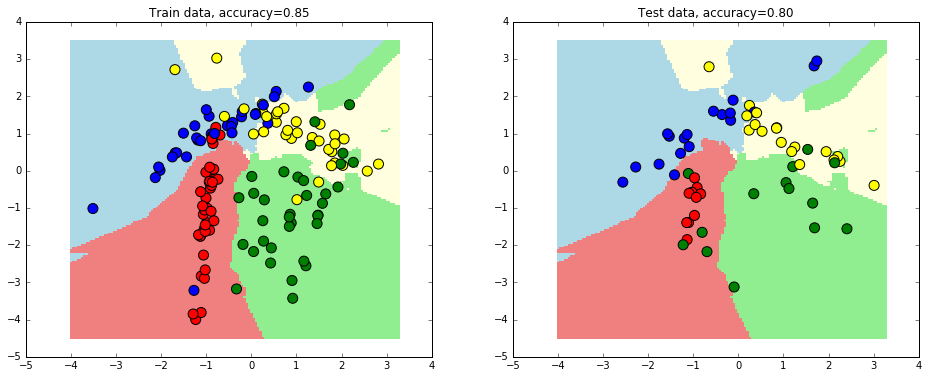

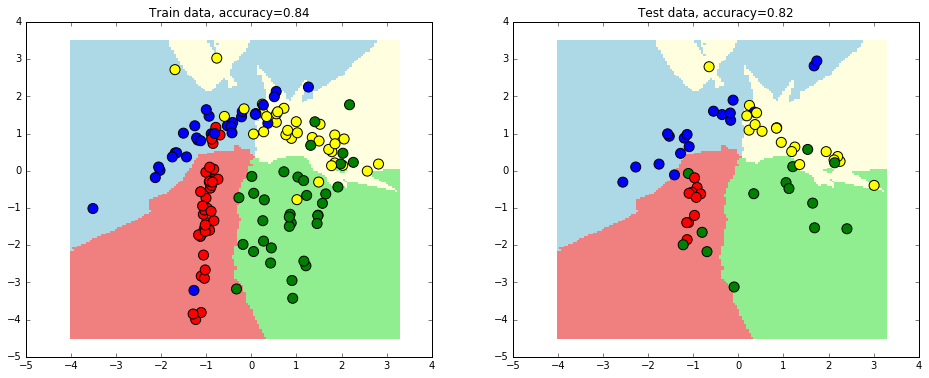

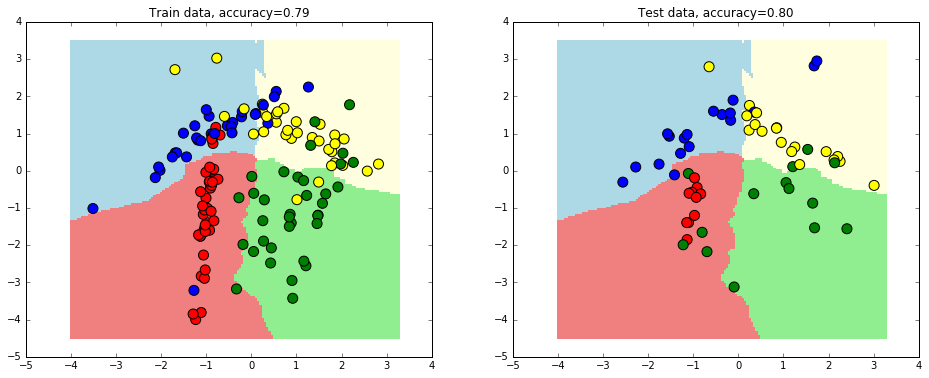

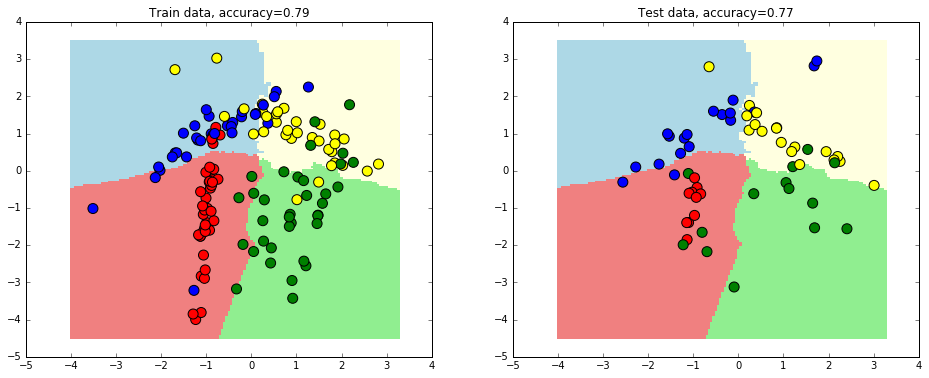

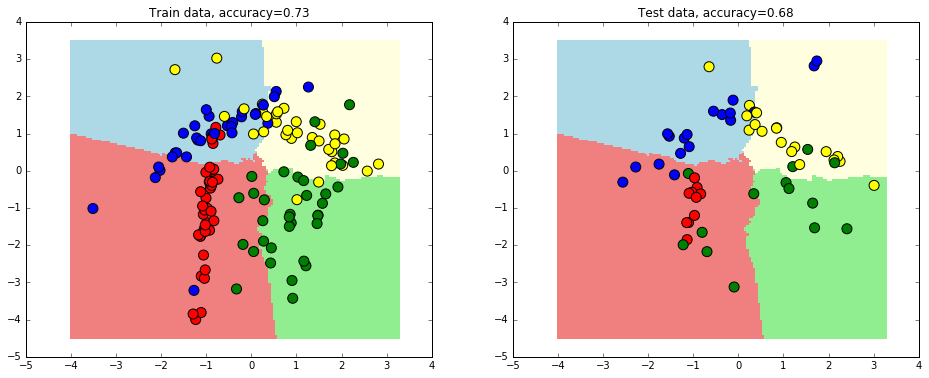

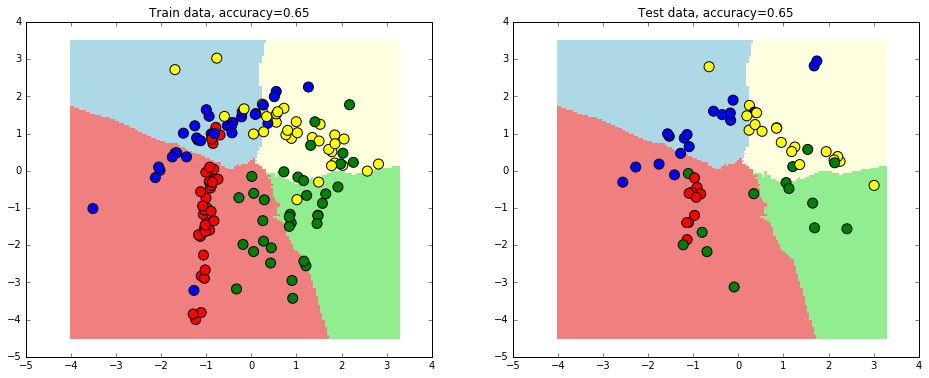

In [162]:
neighbors_range=[2,3,4,5,7,13,20,50,70]
for n_neighbors in neighbors_range:
    estimator = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

Проведем 5-FOLD crossvalidation

In [169]:
accuracy = []
for k in range(1,61):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validation.cross_val_score(estimator, classification_problem[0], classification_problem[1], cv=5)
    accuracy.append(np.mean(scores))

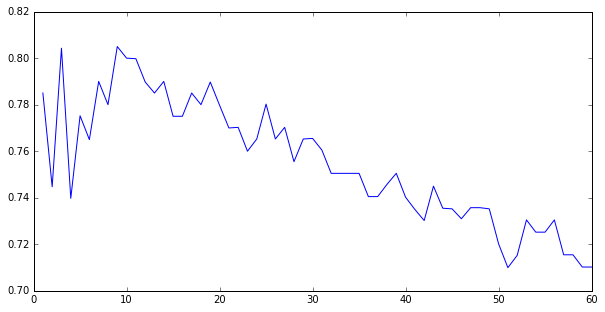

In [172]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,61),accuracy)
plt.show()

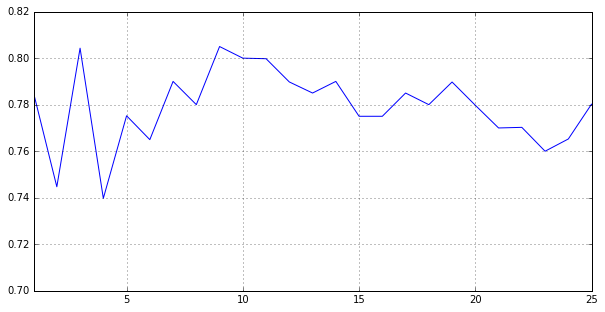

In [179]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(np.arange(1,61),accuracy)
plt.xlim(1,25)
plt.show()

In [181]:
argmax_k = np.argmax(accuracy)
print(argmax_k)

8


Наилучшим $k$ оказалось значение $k=8$

При дальнейшем увеличении значения $k$, точность классификатора падает.